Path from A to F found: A -> C -> F


{('A', 'B'): Text(0.09964967832732514, 0.11334068828658227, '2'),
 ('A', 'C'): Text(-0.3827188988914142, -0.43886945553461315, '3'),
 ('B', 'D'): Text(0.44135586727473625, 0.6279058337685376, '5'),
 ('B', 'E'): Text(0.5629145920770435, 0.5222206645516908, '5'),
 ('C', 'F'): Text(-0.7345141155496782, -0.8409531010355802, '6'),
 ('D', 'E'): Text(0.6348644372223532, 0.727612412748998, '6')}

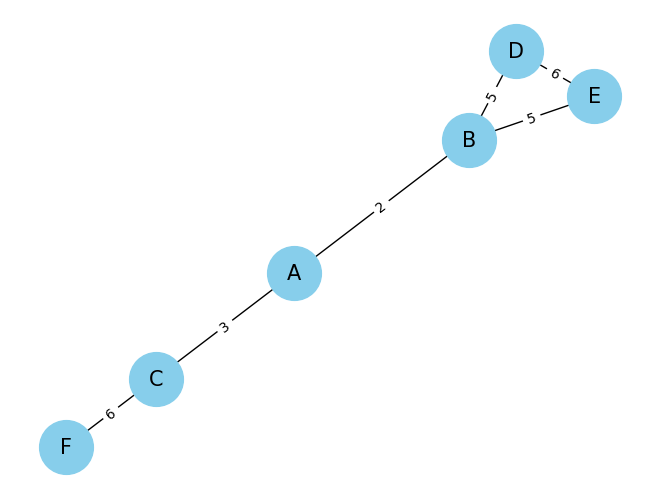

In [32]:
import networkx as nx
import math
import queue

def euclidean_distance(node1, node2, pos):
    x1, y1 = pos[node1]
    x2, y2 = pos[node2]
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def best_first_search(graph, start, goal, heuristic):
    visited = set()
    pri_queue = queue.PriorityQueue()  # Priority queue
    pri_queue.put((heuristic[start], [start]))  # Initial state

    while not pri_queue.empty():
        heruistic_current, current_path = pri_queue.get()
        current_node = current_path[-1]

        if current_node == goal:
            return current_path  # Goal found

        visited.add(current_node)

        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = current_path + [neighbor]
                pri_queue.put((heuristic[neighbor], new_path))

    return []  # Goal not found


# Example graph
G = nx.Graph()
G.add_weighted_edges_from([('A', 'B', 2), ('A', 'C', 3), ('B', 'D', 5), ('B', 'E', 5), ('C', 'F', 6),('D', 'E', 6)])

start_node = 'A'
goal_node = 'F'

# Define positions for the nodes (for Euclidean distance calculation)
pos = nx.spring_layout(G)

# Heuristic function using Euclidean distance
heuristic = {node: euclidean_distance(node, goal_node, pos) for node in G.nodes}

path = best_first_search(G, start_node, goal_node, heuristic)
if path:
    print("Path from {} to {} found: {}".format(start_node, goal_node, ' -> '.join(path)))
else:
    print("No path found from {} to {}".format(start_node, goal_node))



nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=1, font_size=15)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
